In [1]:
import sys,os 
os.chdir('.\..\..')

In [2]:
import deep_nn.deep_nn_model as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras import optimizers

Using TensorFlow backend.


In [3]:
train100 = pd.read_csv("./data_analysis/projekt1/regression/data.activation.train.100.csv")
test100 = pd.read_csv("./data_analysis/projekt1/regression/data.activation.test.100.csv")
len(train100)

100

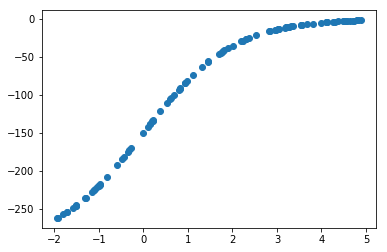

In [4]:
plt.scatter(train100.x, train100.y)

In [5]:
X = train100.x.values.reshape(1, -1)
print(X.shape)
Y = train100.y.values.reshape(1, -1)
print(Y.shape)

(1, 100)
(1, 100)


In [6]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_scaled = X_scaler.fit_transform(train100.x.values.reshape(-1, 1)).reshape(1, -1)
Y_scaled = Y_scaler.fit_transform(train100.y.values.reshape(-1, 1)).reshape(1, -1)

model_builder = nn.SequentialBuilder()
model_builder.add_dense(1, "relu")
model_builder.add_dense(12, "relu")
model_builder.add_dense(12, "relu")
model_builder.add_dense(12, "relu")
model_builder.add_dense(12, "relu")
model_builder.add_dense(1, "linear")
model = model_builder.compile("MSE")

parameters2, costs = model.fit(X_scaled, 
                      Y_scaled, 
                      learning_rate=0.1,
                      momentum=0.9, 
                      mini_batch_size=64)
y_pred2 = model.predict(X_scaled)

[259.98204862]
[6.82196584]
(1, 100)
(1, 100)


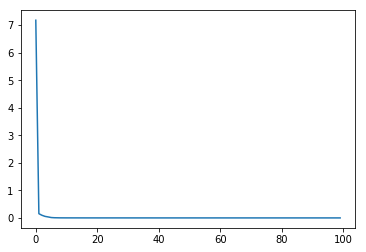

In [25]:
plt.plot(costs)

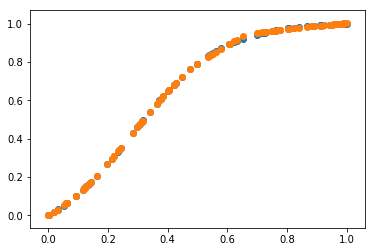

In [11]:
plt.autoscale(enable=True, axis='both', tight=None)
plt.scatter(X_scaled, Y_scaled)
plt.scatter(X_scaled, y_pred2)
plt.show()

In [12]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    #[1, 12, 12, 12, 12, 1]
    model.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='relu'))
    model.add(Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    # Compile model
    sgd = optimizers.Adam(lr=0.1)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

In [13]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=1000)


In [14]:
X_s = X_scaled.T
print(X_s.shape)
Y_s = Y_scaled.T
print(Y_s.shape)

(100, 1)
(100, 1)


In [15]:
history = estimator.fit(X_s, Y_s)

Epoch 1/1000
100/100 [==============================] - 6s 57ms/step - loss: 0.4145
Epoch 2/1000
100/100 [==============================] - 0s 325us/step - loss: 0.1260
Epoch 3/1000
100/100 [==============================] - 0s 259us/step - loss: 0.1218
Epoch 4/1000
100/100 [==============================] - 0s 222us/step - loss: 0.1329
Epoch 5/1000
100/100 [==============================] - 0s 220us/step - loss: 0.0892
Epoch 6/1000
100/100 [==============================] - 0s 256us/step - loss: 0.0354
Epoch 7/1000
100/100 [==============================] - 0s 221us/step - loss: 0.0276
Epoch 8/1000
100/100 [==============================] - 0s 291us/step - loss: 0.0304
Epoch 9/1000
100/100 [==============================] - 0s 263us/step - loss: 0.0207
Epoch 10/1000
100/100 [==============================] - 0s 245us/step - loss: 0.0099
Epoch 11/1000
100/100 [==============================] - 0s 257us/step - loss: 0.2042
Epoch 12/1000
100/100 [==============================] - 0s 294u

100/100 [==============================] - 0s 224us/step - loss: 8.4262e-04
Epoch 95/1000
100/100 [==============================] - 0s 272us/step - loss: 0.0018
Epoch 96/1000
100/100 [==============================] - 0s 265us/step - loss: 0.0016
Epoch 97/1000
100/100 [==============================] - 0s 276us/step - loss: 0.0014
Epoch 98/1000
100/100 [==============================] - 0s 265us/step - loss: 6.9053e-04
Epoch 99/1000
100/100 [==============================] - 0s 246us/step - loss: 3.3278e-04
Epoch 100/1000
100/100 [==============================] - 0s 309us/step - loss: 2.7705e-04
Epoch 101/1000
100/100 [==============================] - 0s 367us/step - loss: 3.6455e-04
Epoch 102/1000
100/100 [==============================] - 0s 264us/step - loss: 4.3220e-04
Epoch 103/1000
100/100 [==============================] - 0s 250us/step - loss: 4.2114e-04
Epoch 104/1000
100/100 [==============================] - 0s 225us/step - loss: 4.2376e-04
Epoch 105/1000
100/100 [=======

100/100 [==============================] - 0s 270us/step - loss: 3.6381e-04
Epoch 186/1000
100/100 [==============================] - 0s 291us/step - loss: 6.7761e-04
Epoch 187/1000
100/100 [==============================] - 0s 275us/step - loss: 3.1371e-04
Epoch 188/1000
100/100 [==============================] - 0s 290us/step - loss: 3.2849e-04
Epoch 189/1000
100/100 [==============================] - 0s 268us/step - loss: 6.3599e-04
Epoch 190/1000
100/100 [==============================] - 0s 262us/step - loss: 0.0015
Epoch 191/1000
100/100 [==============================] - 0s 321us/step - loss: 7.7658e-04
Epoch 192/1000
100/100 [==============================] - 0s 270us/step - loss: 0.0011
Epoch 193/1000
100/100 [==============================] - 0s 258us/step - loss: 7.2854e-04
Epoch 194/1000
100/100 [==============================] - 0s 267us/step - loss: 0.0011
Epoch 195/1000
100/100 [==============================] - 0s 242us/step - loss: 3.9605e-04
Epoch 196/1000
100/100 [==

100/100 [==============================] - 0s 233us/step - loss: 0.0079
Epoch 277/1000
100/100 [==============================] - 0s 255us/step - loss: 0.0047
Epoch 278/1000
100/100 [==============================] - 0s 265us/step - loss: 0.0048
Epoch 279/1000
100/100 [==============================] - 0s 262us/step - loss: 0.0044
Epoch 280/1000
100/100 [==============================] - 0s 263us/step - loss: 0.0042
Epoch 281/1000
100/100 [==============================] - 0s 231us/step - loss: 0.0046
Epoch 282/1000
100/100 [==============================] - 0s 249us/step - loss: 0.0012
Epoch 283/1000
100/100 [==============================] - 0s 298us/step - loss: 0.0036
Epoch 284/1000
100/100 [==============================] - 0s 317us/step - loss: 0.0015
Epoch 285/1000
100/100 [==============================] - 0s 252us/step - loss: 0.0018
Epoch 286/1000
100/100 [==============================] - 0s 241us/step - loss: 6.4703e-04
Epoch 287/1000
100/100 [==============================

Epoch 369/1000
100/100 [==============================] - 0s 274us/step - loss: 3.8348e-04
Epoch 370/1000
100/100 [==============================] - 0s 215us/step - loss: 0.0010
Epoch 371/1000
100/100 [==============================] - 0s 222us/step - loss: 0.0021
Epoch 372/1000
100/100 [==============================] - 0s 258us/step - loss: 0.0013
Epoch 373/1000
100/100 [==============================] - 0s 234us/step - loss: 8.5473e-04
Epoch 374/1000
100/100 [==============================] - 0s 199us/step - loss: 4.7729e-04
Epoch 375/1000
100/100 [==============================] - 0s 215us/step - loss: 6.1898e-04
Epoch 376/1000
100/100 [==============================] - 0s 222us/step - loss: 9.1503e-04
Epoch 377/1000
100/100 [==============================] - 0s 202us/step - loss: 6.7878e-04
Epoch 378/1000
100/100 [==============================] - 0s 227us/step - loss: 4.4494e-04
Epoch 379/1000
100/100 [==============================] - 0s 206us/step - loss: 0.0027
Epoch 380/1000


100/100 [==============================] - 0s 272us/step - loss: 5.5849e-04
Epoch 461/1000
100/100 [==============================] - 0s 257us/step - loss: 4.5315e-04
Epoch 462/1000
100/100 [==============================] - 0s 264us/step - loss: 9.1927e-04
Epoch 463/1000
100/100 [==============================] - 0s 235us/step - loss: 7.2535e-04
Epoch 464/1000
100/100 [==============================] - 0s 247us/step - loss: 0.0010
Epoch 465/1000
100/100 [==============================] - 0s 246us/step - loss: 0.0015
Epoch 466/1000
100/100 [==============================] - 0s 228us/step - loss: 9.0602e-04
Epoch 467/1000
100/100 [==============================] - 0s 256us/step - loss: 9.1400e-04
Epoch 468/1000
100/100 [==============================] - 0s 302us/step - loss: 5.2500e-04
Epoch 469/1000
100/100 [==============================] - 0s 290us/step - loss: 3.6658e-04
Epoch 470/1000
100/100 [==============================] - 0s 262us/step - loss: 3.5224e-04
Epoch 471/1000
100/100

100/100 [==============================] - 0s 231us/step - loss: 5.1679e-04
Epoch 552/1000
100/100 [==============================] - 0s 242us/step - loss: 4.0566e-04
Epoch 553/1000
100/100 [==============================] - 0s 280us/step - loss: 6.0548e-04
Epoch 554/1000
100/100 [==============================] - 0s 269us/step - loss: 4.0980e-04
Epoch 555/1000
100/100 [==============================] - 0s 269us/step - loss: 3.6336e-04
Epoch 556/1000
100/100 [==============================] - 0s 261us/step - loss: 6.6370e-04
Epoch 557/1000
100/100 [==============================] - 0s 257us/step - loss: 7.1854e-04
Epoch 558/1000
100/100 [==============================] - 0s 258us/step - loss: 8.8866e-04
Epoch 559/1000
100/100 [==============================] - 0s 270us/step - loss: 0.0012
Epoch 560/1000
100/100 [==============================] - 0s 254us/step - loss: 0.0023
Epoch 561/1000
100/100 [==============================] - 0s 273us/step - loss: 0.0018
Epoch 562/1000
100/100 [==

100/100 [==============================] - 0s 253us/step - loss: 4.6598e-04
Epoch 644/1000
100/100 [==============================] - 0s 282us/step - loss: 5.3066e-04
Epoch 645/1000
100/100 [==============================] - 0s 260us/step - loss: 4.7098e-04
Epoch 646/1000
100/100 [==============================] - 0s 241us/step - loss: 3.0214e-04
Epoch 647/1000
100/100 [==============================] - 0s 244us/step - loss: 3.0723e-04
Epoch 648/1000
100/100 [==============================] - 0s 268us/step - loss: 0.0016
Epoch 649/1000
100/100 [==============================] - 0s 238us/step - loss: 0.0014
Epoch 650/1000
100/100 [==============================] - 0s 263us/step - loss: 0.0025
Epoch 651/1000
100/100 [==============================] - 0s 228us/step - loss: 0.0021
Epoch 652/1000
100/100 [==============================] - 0s 253us/step - loss: 0.0025
Epoch 653/1000
100/100 [==============================] - 0s 265us/step - loss: 0.0019
Epoch 654/1000
100/100 [==============

100/100 [==============================] - 0s 255us/step - loss: 7.2961e-04
Epoch 736/1000
100/100 [==============================] - 0s 278us/step - loss: 0.0041
Epoch 737/1000
100/100 [==============================] - 0s 280us/step - loss: 0.0073
Epoch 738/1000
100/100 [==============================] - 0s 274us/step - loss: 0.0070
Epoch 739/1000
100/100 [==============================] - 0s 293us/step - loss: 0.0059
Epoch 740/1000
100/100 [==============================] - 0s 259us/step - loss: 0.0065
Epoch 741/1000
100/100 [==============================] - 0s 273us/step - loss: 0.0067
Epoch 742/1000
100/100 [==============================] - 0s 227us/step - loss: 0.0066
Epoch 743/1000
100/100 [==============================] - 0s 238us/step - loss: 0.0049
Epoch 744/1000
100/100 [==============================] - 0s 261us/step - loss: 0.0049
Epoch 745/1000
100/100 [==============================] - 0s 261us/step - loss: 0.0036
Epoch 746/1000
100/100 [==============================

100/100 [==============================] - 0s 264us/step - loss: 0.0031
Epoch 830/1000
100/100 [==============================] - 0s 283us/step - loss: 0.0039
Epoch 831/1000
100/100 [==============================] - 0s 264us/step - loss: 0.0047
Epoch 832/1000
100/100 [==============================] - 0s 252us/step - loss: 0.0074
Epoch 833/1000
100/100 [==============================] - 0s 274us/step - loss: 0.0033
Epoch 834/1000
100/100 [==============================] - 0s 224us/step - loss: 0.0023
Epoch 835/1000
100/100 [==============================] - 0s 243us/step - loss: 0.0014
Epoch 836/1000
100/100 [==============================] - 0s 247us/step - loss: 0.0020
Epoch 837/1000
100/100 [==============================] - 0s 229us/step - loss: 0.0011
Epoch 838/1000
100/100 [==============================] - 0s 200us/step - loss: 8.8999e-04
Epoch 839/1000
100/100 [==============================] - 0s 214us/step - loss: 8.8967e-04
Epoch 840/1000
100/100 [==========================

100/100 [==============================] - 0s 238us/step - loss: 0.0050
Epoch 923/1000
100/100 [==============================] - 0s 236us/step - loss: 0.0044
Epoch 924/1000
100/100 [==============================] - 0s 259us/step - loss: 0.0062
Epoch 925/1000
100/100 [==============================] - 0s 285us/step - loss: 0.0057
Epoch 926/1000
100/100 [==============================] - 0s 264us/step - loss: 0.0035
Epoch 927/1000
100/100 [==============================] - 0s 287us/step - loss: 0.0034
Epoch 928/1000
100/100 [==============================] - 0s 312us/step - loss: 0.0084
Epoch 929/1000
100/100 [==============================] - 0s 357us/step - loss: 0.0095
Epoch 930/1000
100/100 [==============================] - 0s 240us/step - loss: 0.0126
Epoch 931/1000
100/100 [==============================] - 0s 294us/step - loss: 0.0104
Epoch 932/1000
100/100 [==============================] - 0s 334us/step - loss: 0.0083
Epoch 933/1000
100/100 [==============================] - 

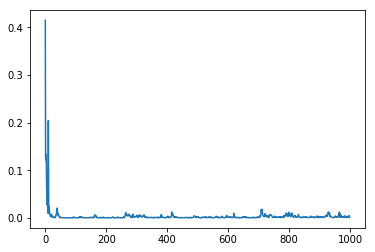

In [16]:
plt.plot(history.history['loss'])

In [17]:
y_pred_keras = estimator.predict(X_s)

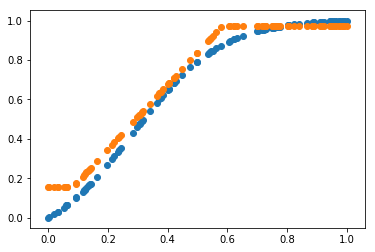

In [18]:
plt.autoscale(enable=True, axis='both', tight=None)
plt.scatter(X_s, Y_s)
plt.scatter(X_s, y_pred_keras)
plt.show()